In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math

In [2]:
df = pd.read_csv('24ieee.csv')
df

,F,t,r,x,b,T,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,2,0.0026,0.0139,0.4611,175,250,200,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,1,3,0.0546,0.2112,0.0572,175,208,220,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,1,5,0.0218,0.0845,0.0229,175,208,220,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2,4,0.0328,0.1267,0.0343,175,208,220,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2,6,0.0497,0.1920,0.0520,175,208,220,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
5,3,9,0.0308,0.1190,0.0322,175,208,220,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
6,3,24,0.0023,0.0839,0.0000,400,510,600,1.03,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
7,4,9,0.0268,0.1037,0.0281,175,208,220,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
8,5,10,0.0228,0.0883,0.0239,175,208,220,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
9,6,10,0.0139,0.0605,2.4590,175,193,200,0.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [3]:
import itertools
def findsubsets(s, n):
    return [list(set(i)) for i in itertools.combinations(s, n)]
def select_mn(s,n):
    A = findsubsets(s, n)
    B = []
    for a in A:
        a.sort()
        B.append(tuple(a) )
    return B

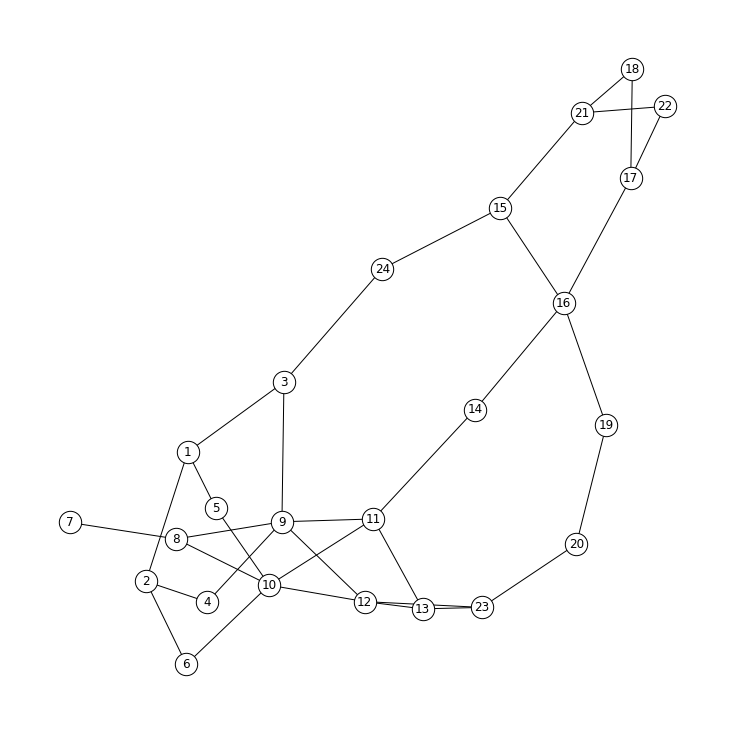

In [4]:

for nseed in range(1): 
    nseed = random.randint(1,100)
    nseed = 91
    G = nx.Graph()  # 5x5 grid
    for r in range(len(df)):
        f = df.loc[r,'F']
        t = df.loc[r,'t']
        G.add_edge(f,t)
    pos = nx.spring_layout(G, scale=2, seed=nseed, iterations=100)
    plt.figure(figsize=(10,10))
    nx.draw(G, pos, node_color = 'white' ,edgecolors ='k', node_size=500, with_labels= True)

connect={}
coordinate = {}
nodes = []
for e in G.edges:
    connect[e[0]+1,e[1]+1]=1
    nodes.append(e[0]+1)
    nodes.append(e[1]+1)
    
nodes= list(set(nodes))
N= len(nodes)
for n in G.nodes:
    coordinate[n+1,'X']=pos[n][0]
    coordinate[n+1,'Y']=pos[n][1]
plt.savefig('base_graph'+  ' .png', format='png', dpi=400)
plt.show()

In [5]:
minn = min([n for n in G.nodes()])
connect = []
for e in G.edges():
    connect+=[(min(e[1]+1-minn,e[0]+1-minn) ,max(e[1]+1-minn,e[0]+1-minn) )  ]

In [6]:
N = len(G.nodes())
s = {i for i in range(1,N+1)}
n = 3
comb = findsubsets(s, n) 
comb = select_mn(s,n)
len(comb)
print(N,minn)

24 1


In [7]:
model = AbstractModel()
model.link = Set(initialize = connect)
model.combination = Set(initialize = comb)
model.i = RangeSet(N)
model.j = Set(initialize = model.i)
model.U = Var(model.i,model.j, initialize = 1, within=Binary)
model.v = Var(model.i, initialize = 0, within=Binary)
model.budget = Param(mutable=True, initialize =5)

def Rule_C1(model,i,j):
    return model.U[i,j] + model.v[i] + model.v[j]>= 1
model.C1=Constraint(model.link, rule=Rule_C1)

def Rule_C2A(model,i,j,l):
    return model.U[i,j] +model.U[j,l] -  model.U[i,l] <= 1
model.C2A=Constraint(model.combination, rule=Rule_C2A)

def Rule_C2B(model,i,j,l):
    return model.U[i,j] -model.U[j,l] +  model.U[i,l] <= 1
model.C2B=Constraint(model.combination, rule=Rule_C2B)

def Rule_C2C(model,i,j,l):
    return -model.U[i,j] +model.U[j,l] +  model.U[i,l] <= 1
model.C2C=Constraint(model.combination, rule=Rule_C2C)

def Rule_C3(model):
    return sum(model.v[i] for i in model.i) <= model.budget
model.C3=Constraint(rule=Rule_C3)

def rule_OF(model):
    return sum(model.U[i,j] for (i,j) in model.link) #OF2 
model.obj = Objective(rule=rule_OF, sense=minimize)

In [8]:
opt = SolverFactory('cbc')
instance = model.create_instance()  

In [9]:
results = opt.solve(instance, options={"threads": 4, 'rel_gap':0.01})

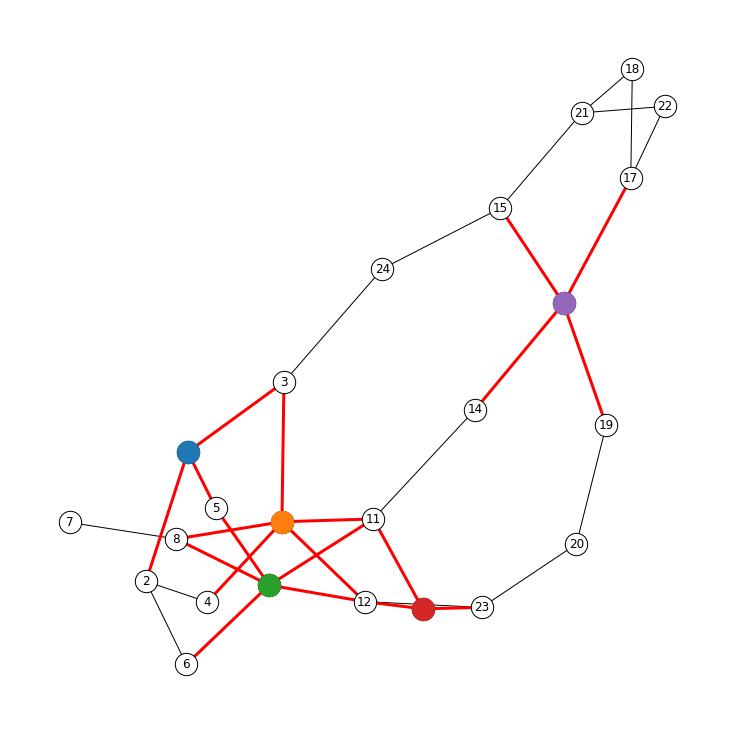

In [10]:
KOLOR = ['r', 'k', 'b', 'g', 'gold', 'pink','dodgerblue','orange','brown','olive']
plt.figure(figsize=(10,10))
nx.draw(G, pos, node_color = 'white' ,edgecolors ='k', node_size=500, with_labels= True)
for i in instance.i:
    if value(instance.v[i])>0:
        x= pos[i-1+minn][0]
        y= pos[i-1+minn][1]
        plt.scatter(x,y,s=500, zorder =5) 

plt.savefig('base_graph nodes'+  ' .png', format='png', dpi=400)
for (i,j) in instance.link:
    if value(instance.U[i,j])== 0:
        x1, y1 = pos[i][0],pos[i][1]
        x2, y2 = pos[j][0],pos[j][1]
        plt.plot([x1,x2] , [y1,y2] , c= 'r' , lw= 3, zorder  = 1)
plt.show()